<a href="https://colab.research.google.com/github/AgustinCocciardi/IA-Aplicada/blob/main/03_NLP_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca spaCy

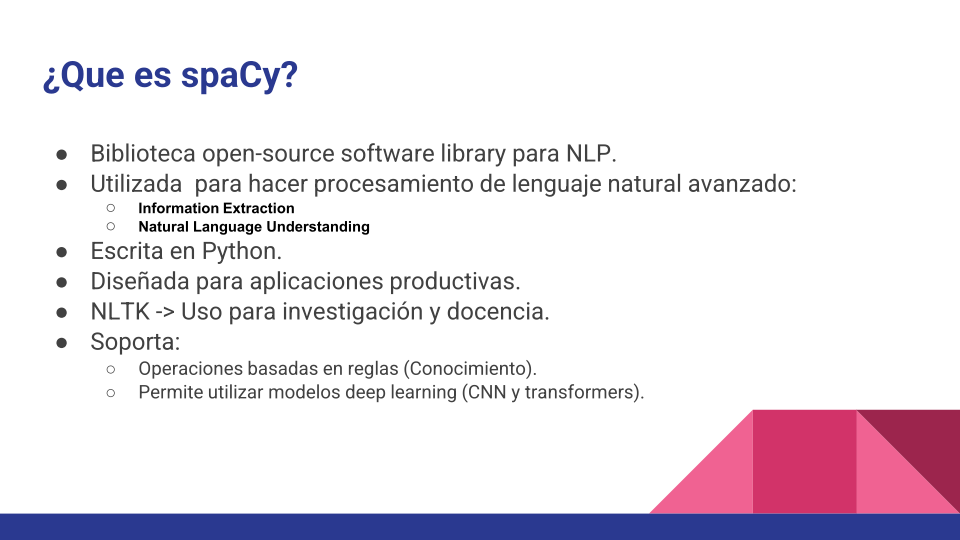

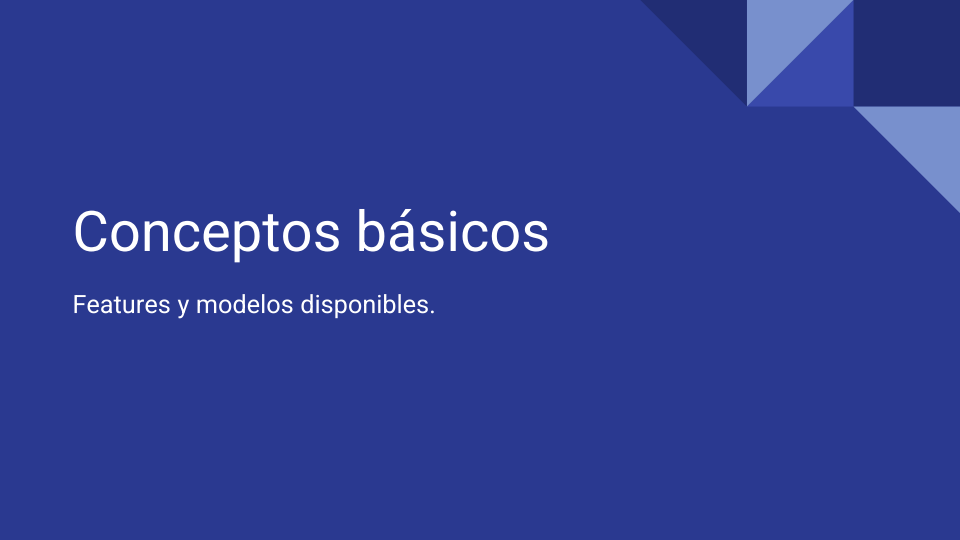

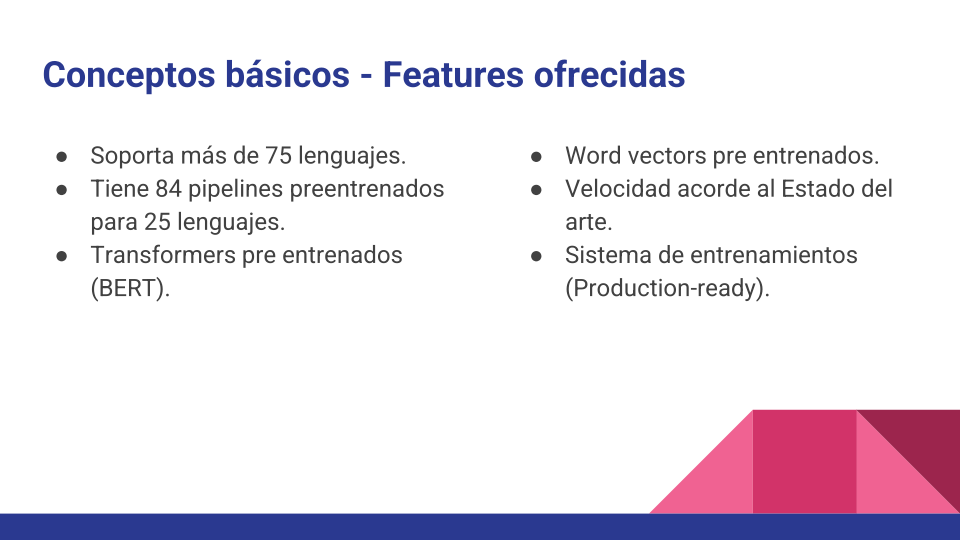

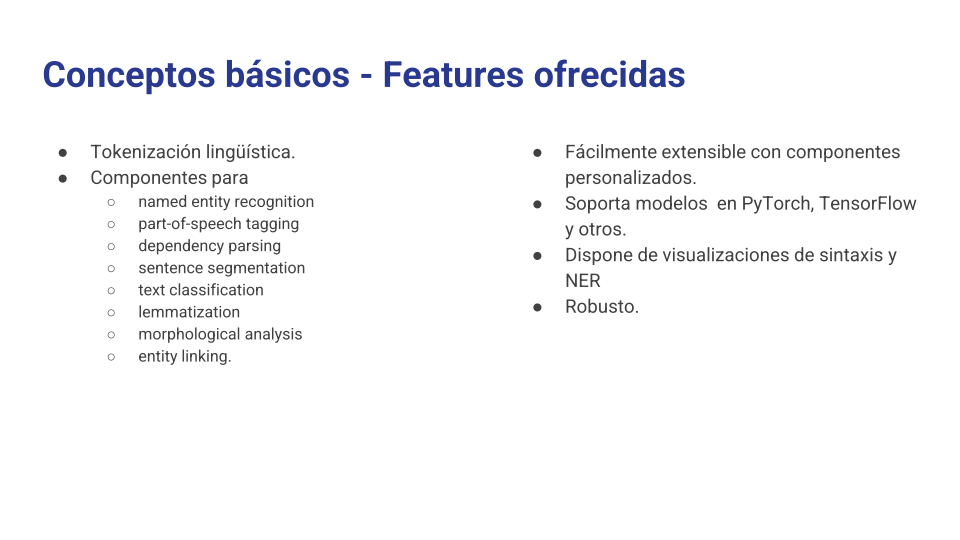

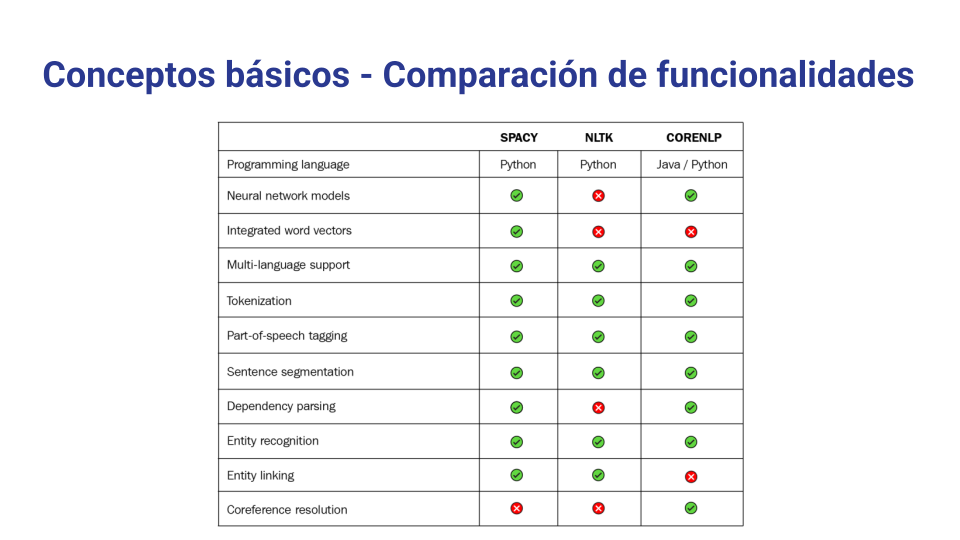

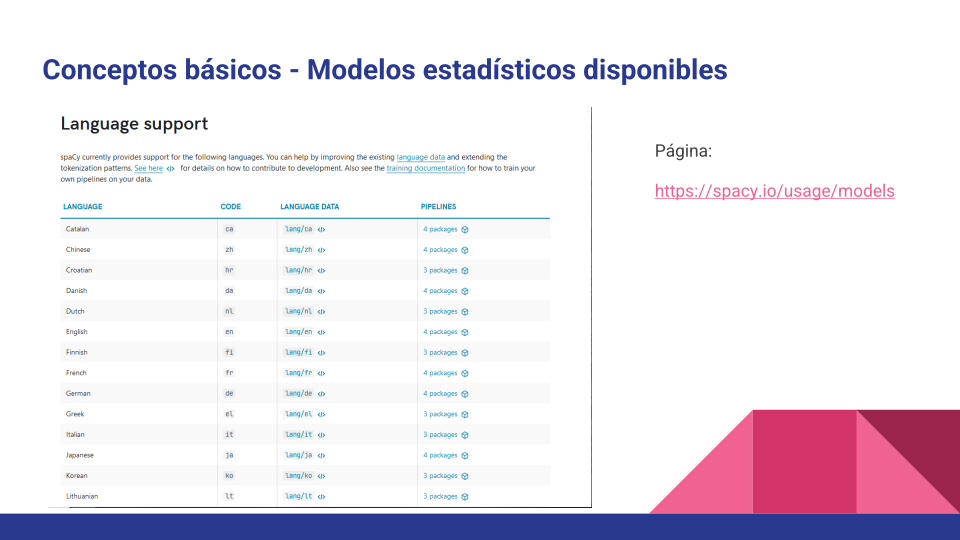

Para más detalle ver [models](https://spacy.io/usage/models)

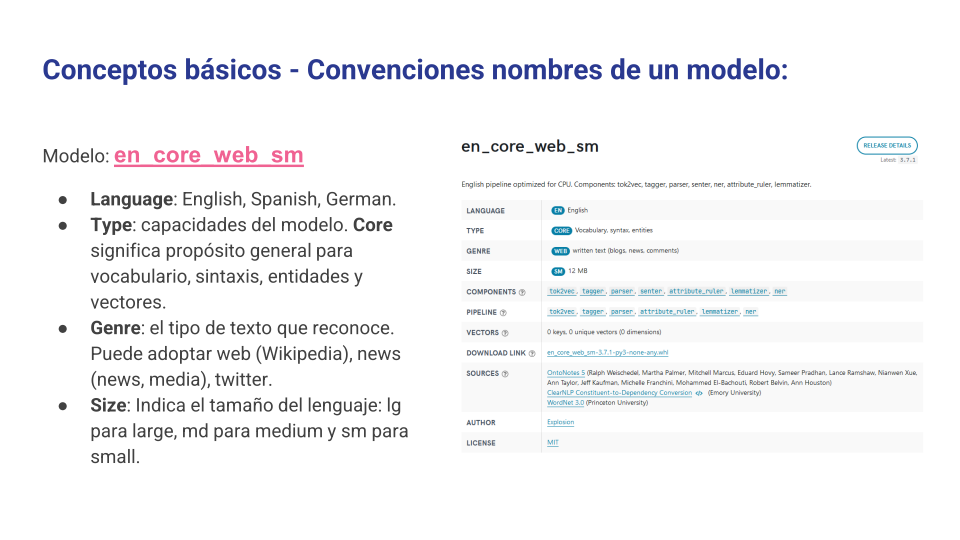

Ver mas en la ficha del modelo [en_core_web_sm](https://spacy.io/models/en#en_core_web_sm)

## Carga de modelos en colabs

In [1]:
import spacy
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


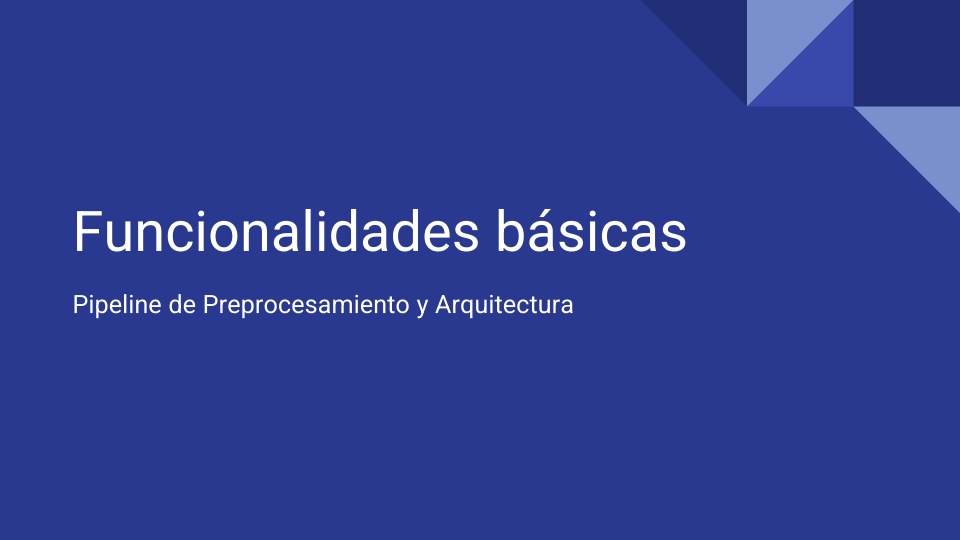

## spaCy funciones básicas

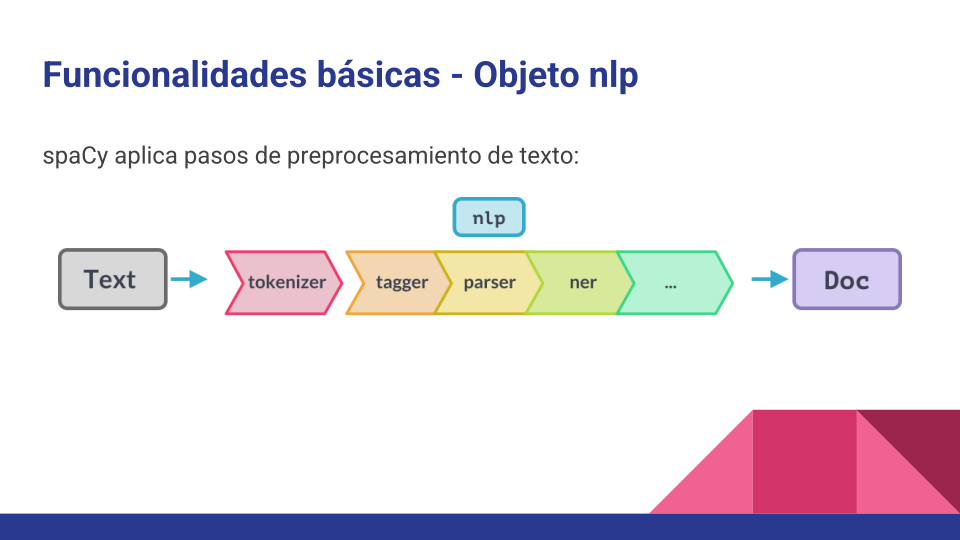

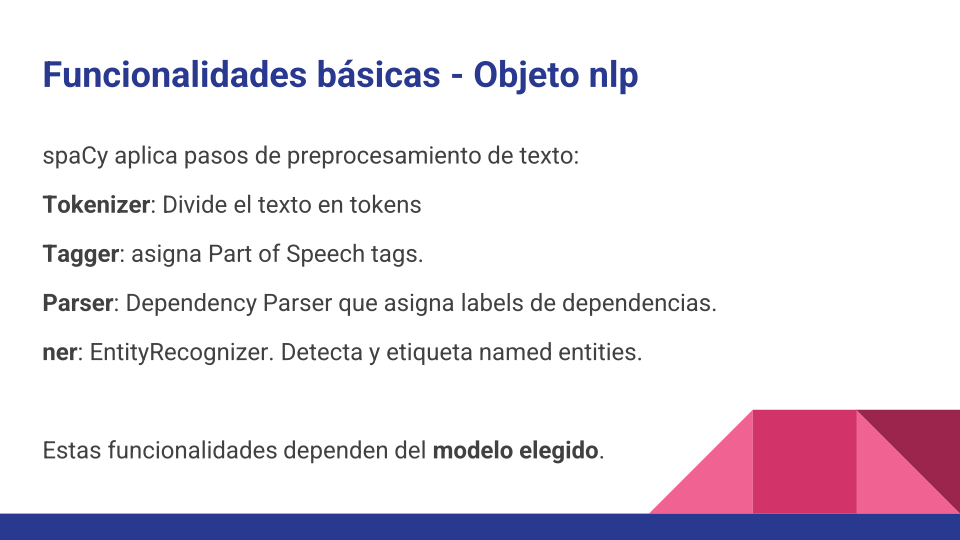

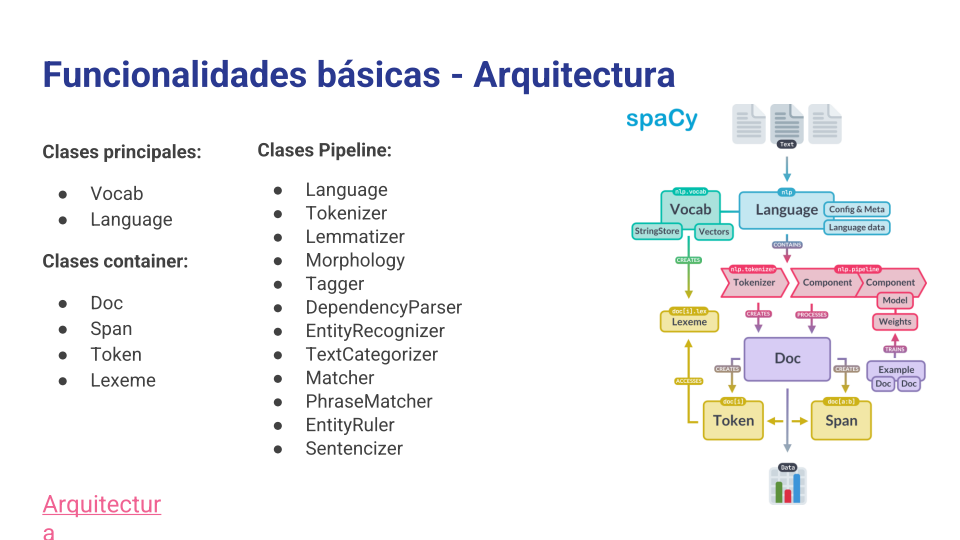

Ver más sobre la arquitectura en este [link](https://spacy.io/usage/spacy-101#architecture)

### Tokenización

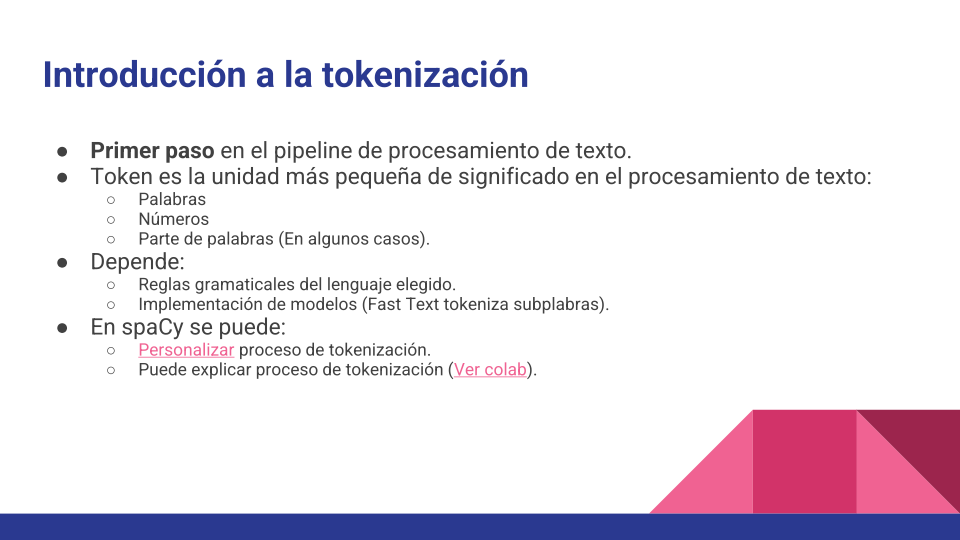

Ver personalización de tokenization en este [link](https://spacy.io/usage/linguistic-features#special-cases)

In [2]:
text = "esta es una clase en la universidad nacional de La Matanza"
nlp = spacy.load('es_core_news_md')
doc = nlp(text)
print([token.text for token in doc])

['esta', 'es', 'una', 'clase', 'en', 'la', 'universidad', 'nacional', 'de', 'La', 'Matanza']


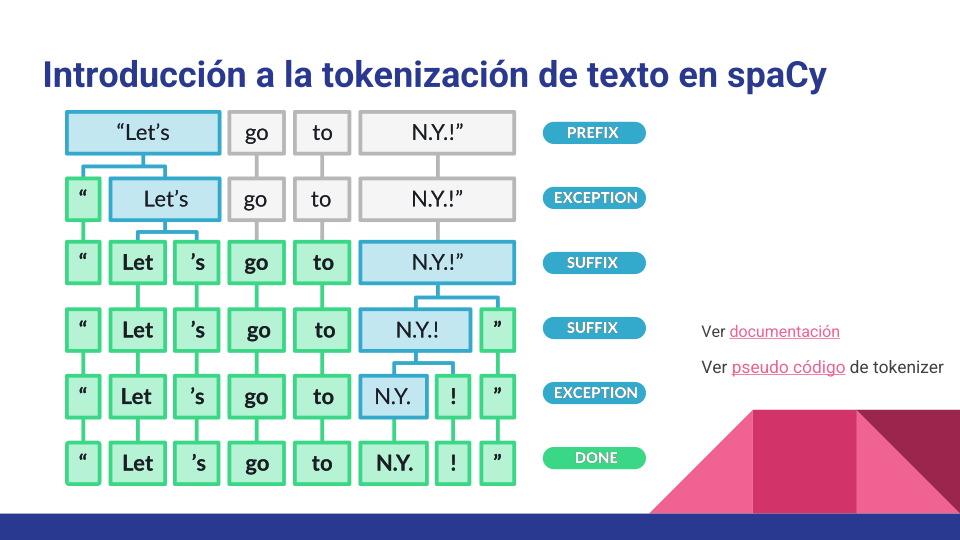

Ver [documentacion](https://spacy.io/usage/linguistic-features#tokenization) en este enlace <br/>
Ver [pseudo código](https://spacy.io/usage/linguistic-features#how-tokenizer-works) de tokenizer

#### Explicar tokenizacion

In [3]:
nlp.tokenizer.explain(text)

[('TOKEN', 'esta'),
 ('TOKEN', 'es'),
 ('TOKEN', 'una'),
 ('TOKEN', 'clase'),
 ('TOKEN', 'en'),
 ('TOKEN', 'la'),
 ('TOKEN', 'universidad'),
 ('TOKEN', 'nacional'),
 ('TOKEN', 'de'),
 ('TOKEN', 'La'),
 ('TOKEN', 'Matanza')]

In [4]:
textToExplain = "¡¡¡esta es una clase aplicada en la universidad nacional de La Matanza!!!"
nlp.tokenizer.explain(textToExplain)

[('PREFIX', '¡'),
 ('PREFIX', '¡'),
 ('PREFIX', '¡'),
 ('TOKEN', 'esta'),
 ('TOKEN', 'es'),
 ('TOKEN', 'una'),
 ('TOKEN', 'clase'),
 ('TOKEN', 'aplicada'),
 ('TOKEN', 'en'),
 ('TOKEN', 'la'),
 ('TOKEN', 'universidad'),
 ('TOKEN', 'nacional'),
 ('TOKEN', 'de'),
 ('TOKEN', 'La'),
 ('TOKEN', 'Matanza'),
 ('SUFFIX', '!'),
 ('SUFFIX', '!'),
 ('SUFFIX', '!')]

### Segmentación de oraciones

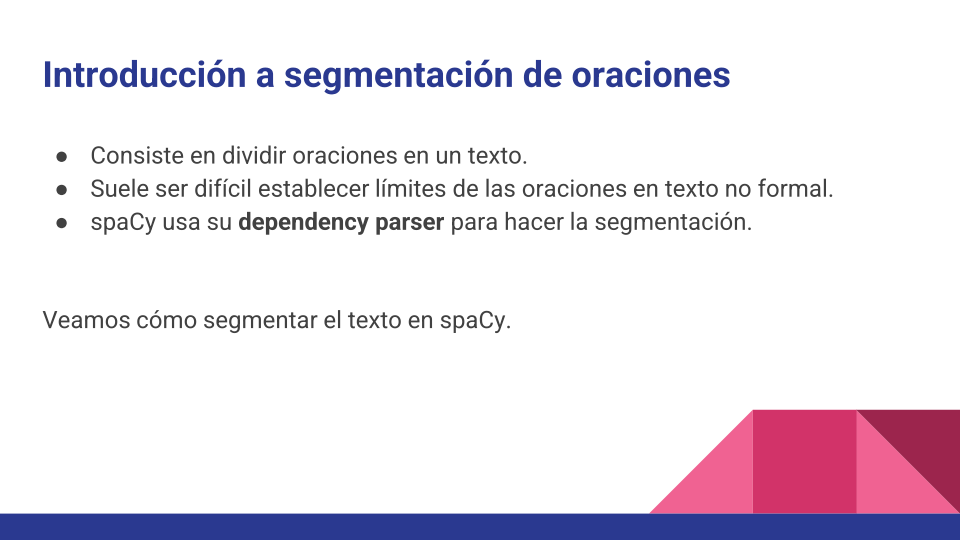

In [49]:
nlp = spacy.load('es_core_news_md')
text = "Esta es nuestra clase de NLP con spaCy. La clase comienza a las 19:00pm."
doc = nlp(text)
for sentence in doc.sents:
  print(sentence.text)

Esta es nuestra clase de NLP con spaCy.
La clase comienza a las 19:00pm.


### Introduccion a Lemmatization

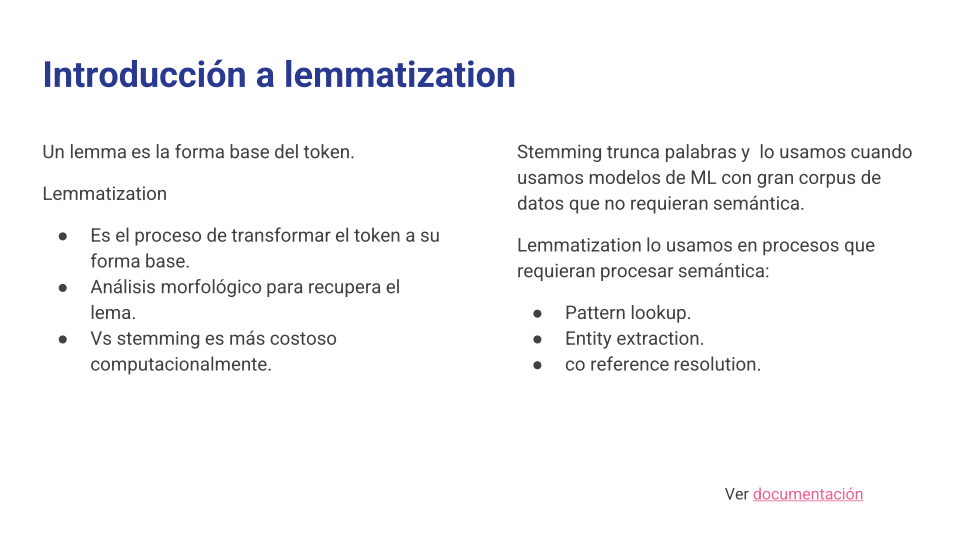

In [6]:
text = "El niño está jugando al fútbol con sus amigos del barrio"
nlp = spacy.load('es_core_news_md')
doc = nlp(text)
for token in doc:
  print("Token:", token.text," Lemma:", token.lemma_)


Token: El  Lemma: el
Token: niño  Lemma: niño
Token: está  Lemma: estar
Token: jugando  Lemma: jugar
Token: al  Lemma: al
Token: fútbol  Lemma: fútbol
Token: con  Lemma: con
Token: sus  Lemma: su
Token: amigos  Lemma: amigo
Token: del  Lemma: del
Token: barrio  Lemma: barrio


#### Lemmatization en NLU

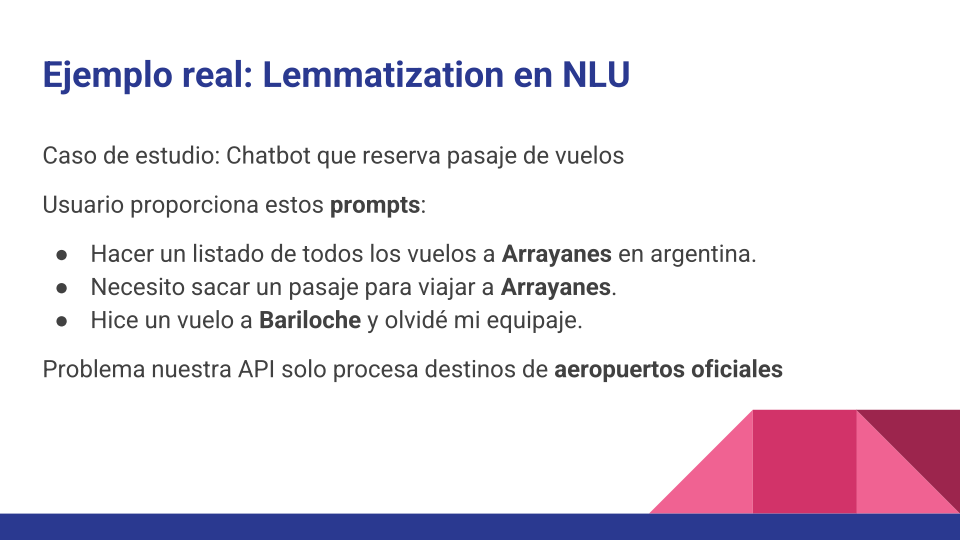

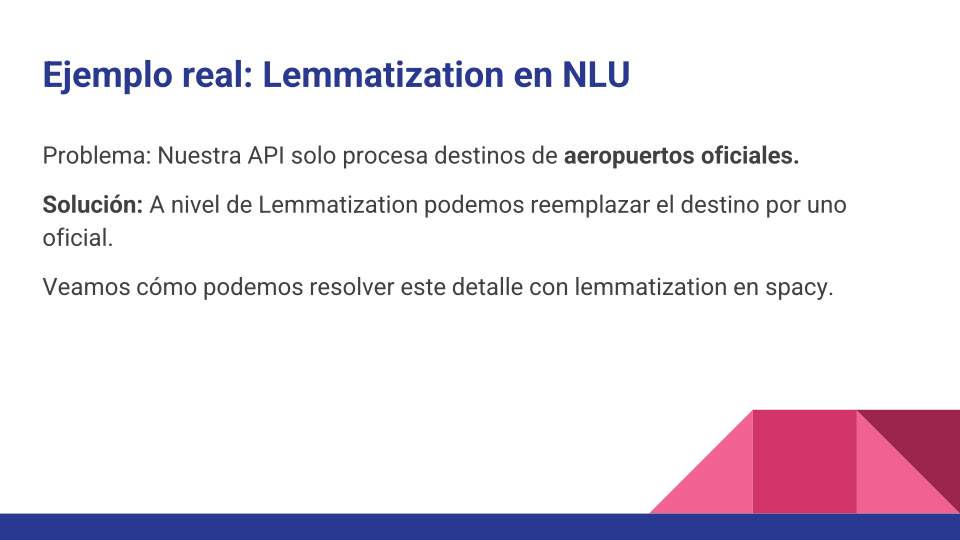

In [7]:
text = "Necesito sacar un pasaje para viajar a Arrayanes."
nlp = spacy.load('es_core_news_md')

In [8]:
nlp.get_pipe('attribute_ruler').add([[{"TEXT": "Arrayanes"}]], {"LEMMA": "Bariloche (BRC)"})

In [9]:
doc = nlp(text)
for token in doc:
  print("Token:", token.text," Lemma:", token.lemma_)

Token: Necesito  Lemma: necesitar
Token: sacar  Lemma: sacar
Token: un  Lemma: uno
Token: pasaje  Lemma: pasaje
Token: para  Lemma: para
Token: viajar  Lemma: viajar
Token: a  Lemma: a
Token: Arrayanes  Lemma: Bariloche (BRC)
Token: .  Lemma: .


### spaCy container Objects

#### Doc

In [10]:
nlp = spacy.load('es_core_news_md')
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

In [11]:
print(doc.text)

esta es una clase en la Universidad Nacional de La Matanza en San Justo


In [12]:
for token in doc:
  print(token.text)

esta
es
una
clase
en
la
Universidad
Nacional
de
La
Matanza
en
San
Justo


Indexado y cantidad de tokens

In [13]:
print(doc[1])

es


In [14]:
len(doc)

14

Entidades (Sustantivos propios por ahora)

In [15]:
print(doc.ents)

(Universidad Nacional de La Matanza, San Justo)


Lenguaje

In [16]:
print(doc.lang_)

es


Conversion a json

In [17]:
import json
json_doc = doc.to_json()

In [18]:
json_str = json.dumps(json_doc, indent=4)
print(json_str)

{
    "text": "esta es una clase en la Universidad Nacional de La Matanza en San Justo",
    "ents": [
        {
            "start": 24,
            "end": 58,
            "label": "ORG"
        },
        {
            "start": 62,
            "end": 71,
            "label": "LOC"
        }
    ],
    "sents": [
        {
            "start": 0,
            "end": 71
        }
    ],
    "tokens": [
        {
            "id": 0,
            "start": 0,
            "end": 4,
            "tag": "PRON",
            "pos": "PRON",
            "morph": "Gender=Fem|Number=Sing|PronType=Dem",
            "lemma": "este",
            "dep": "nsubj",
            "head": 3
        },
        {
            "id": 1,
            "start": 5,
            "end": 7,
            "tag": "AUX",
            "pos": "AUX",
            "morph": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
            "lemma": "ser",
            "dep": "cop",
            "head": 3
        },
        {
          

#### Token

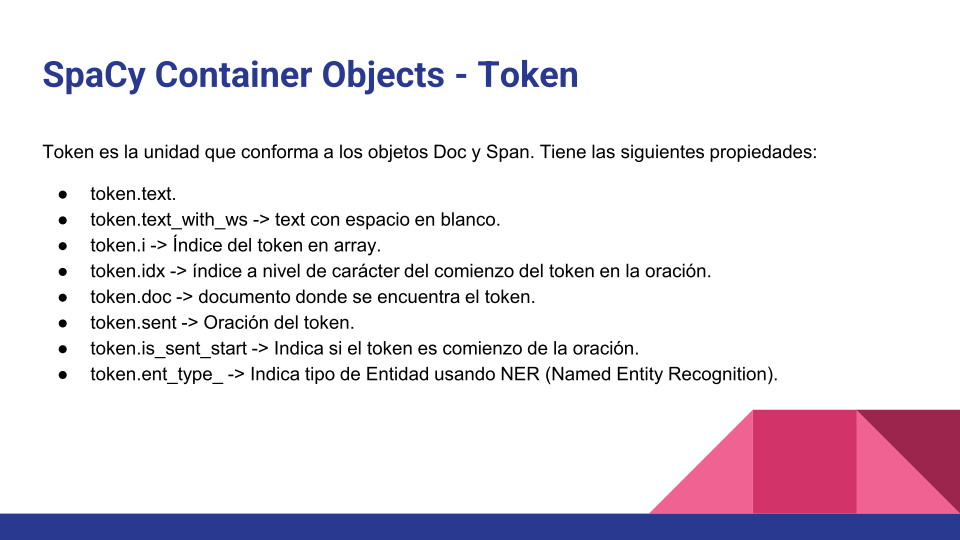

In [19]:
nlp = spacy.load('es_core_news_md')
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

In [20]:
token = doc[6]

In [21]:
token.text

'Universidad'

In [22]:
token.text_with_ws

'Universidad '

Indexados del token

In [23]:
len(token)

11

In [24]:
token.i

6

In [25]:
token.idx

24

Referencias inversas del token

In [26]:
token.doc

esta es una clase en la Universidad Nacional de La Matanza en San Justo

In [27]:
token.sent

esta es una clase en la Universidad Nacional de La Matanza en San Justo

Comienzos y finalización de oraciones

In [28]:
doc = nlp("Esta es nuestra clase de NLP con spaCy. La clase comienza a las 19:00pm.")

In [29]:
doc[0].is_sent_start

True

In [30]:
doc[9].is_sent_start

True

In [31]:
doc[10].is_sent_start

False

Lemmas y entidades NER

In [32]:
doc[0].lemma_

'este'

In [33]:
doc = nlp("El presidente Milei tuvo una reunión con Trump en Estados Unidos")

In [34]:
doc.ents

(Milei, Trump, en Estados Unidos)

In [35]:
doc[2].ent_type_

'PER'

In [36]:
doc[7].ent_type_

'PER'

In [37]:
doc[9].ent_type_

'LOC'

#### Span

In [38]:
nlp = spacy.load('es_core_news_md')
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

Span a nivel token:

In [39]:
doc[2:4]

una clase

In [40]:
doc[2:]

una clase en la Universidad Nacional de La Matanza en San Justo

In [41]:
doc[3:-3]

clase en la Universidad Nacional de La Matanza

Iteracion de span

In [42]:
span = doc[3:-3]

In [43]:
for token in span:
  print(token)

clase
en
la
Universidad
Nacional
de
La
Matanza


Span a nivel de caracter

In [44]:
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

In [45]:
span = doc[5:11]

In [46]:
print(span)

la Universidad Nacional de La Matanza


In [47]:
char_span = span.char_span(3, 37, label="ORG")

In [48]:
print(char_span)

Universidad Nacional de La Matanza


Ver más información [Doc](https://spacy.io/api/doc), [Token](https://spacy.io/api/token) y [Span](https://spacy.io/api/span)

## spaCy funciones linguísticas

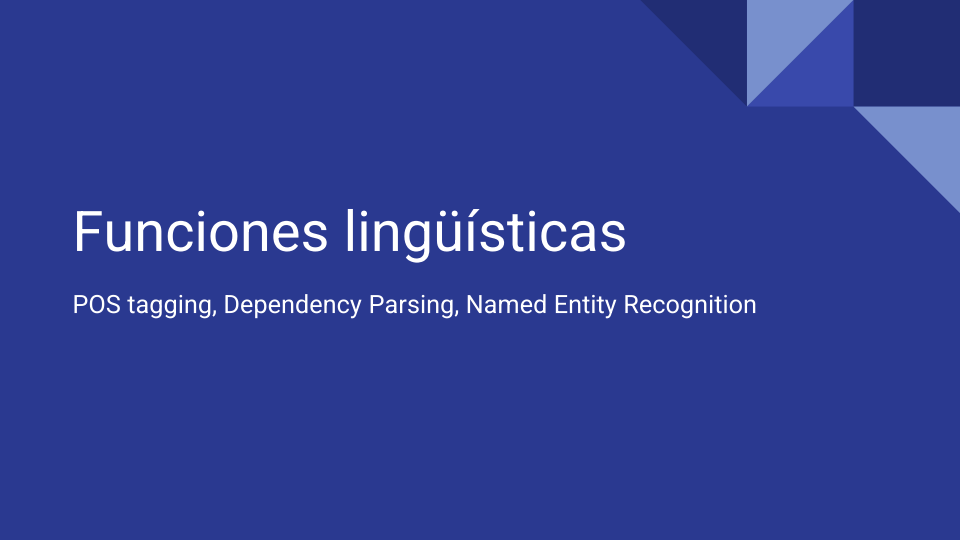

### Part of Speech (POS) tagger:

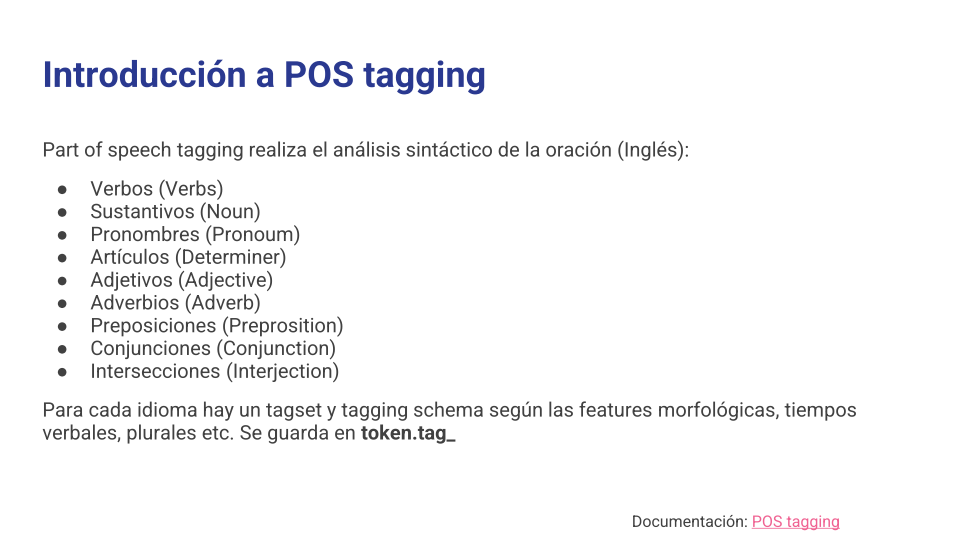

Documentación: [POS tagging](https://spacy.io/usage/linguistic-features#pos-tagging)

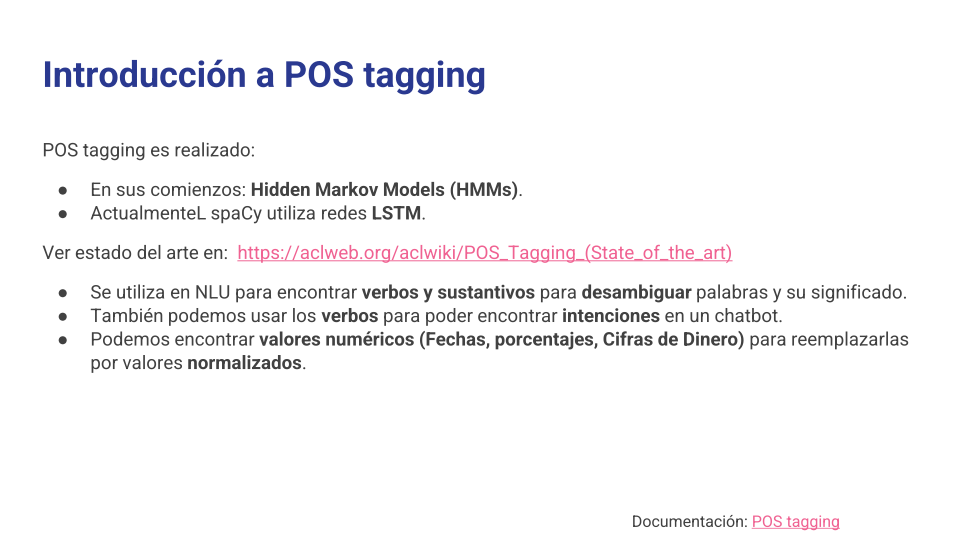

Documentación: [POS tagging](https://spacy.io/usage/linguistic-features#pos-tagging)

In [50]:
nlp = spacy.load('es_core_news_md')
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

### Explicar valores variables de spaCy

In [ ]:
spacy.explain("NNS")

'noun, plural'

In [ ]:
for token in doc:
  print(token.text, token.pos_, token.tag_, spacy.explain(token.pos_), spacy.explain(token.tag_))

esta PRON PRON pronoun pronoun
es AUX AUX auxiliary auxiliary
una DET DET determiner determiner
clase NOUN NOUN noun noun
en ADP ADP adposition adposition
la DET DET determiner determiner
Universidad PROPN PROPN proper noun proper noun
Nacional PROPN PROPN proper noun proper noun
de ADP ADP adposition adposition
La DET DET determiner determiner
Matanza PROPN PROPN proper noun proper noun
en ADP ADP adposition adposition
San PROPN PROPN proper noun proper noun
Justo PROPN PROPN proper noun proper noun


### Dependency Parsing

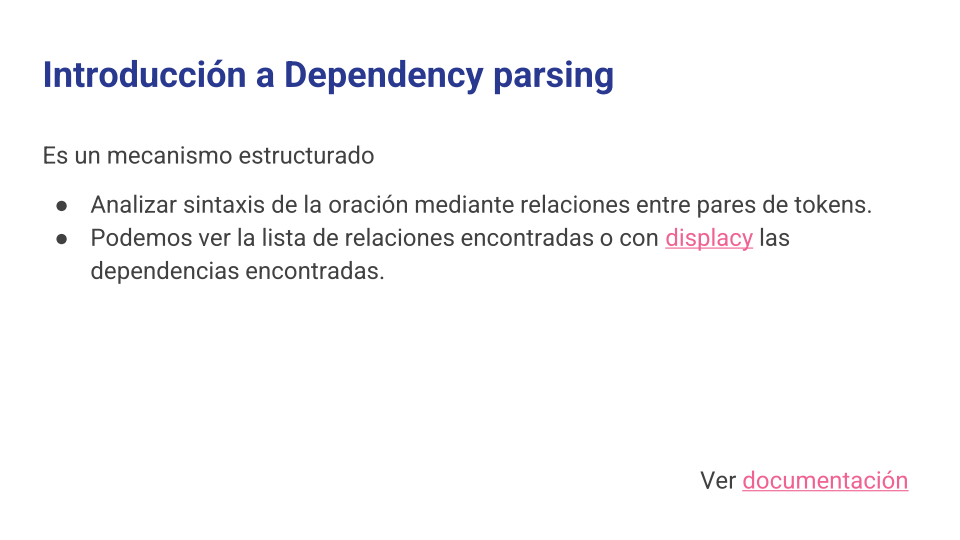

Ver [Displacy](https://spacy.io/usage/visualizers) </br>
Ver [Documentación](https://spacy.io/usage/linguistic-features#dependency-parse)

In [51]:
nlp = spacy.load('es_core_news_md')
doc = nlp("esta es una clase en la Universidad Nacional de La Matanza en San Justo")

In [52]:
for token in doc:
  print(token.text, token.dep_)

esta nsubj
es cop
una det
clase ROOT
en case
la det
Universidad nmod
Nacional flat
de case
La det
Matanza flat
en case
San nmod
Justo flat


In [53]:
from spacy import displacy # Ver documentacion de displacy -> https://spacy.io/usage/visualizers

In [54]:
displacy.render(doc, style="dep")

In [55]:
#Explorar significados de relaciones:
spacy.explain('nsubj')

'nominal subject'

In [56]:
spacy.explain('nmod')

'modifier of nominal'

In [57]:
spacy.explain('flat')

'flat multiword expression'

In [58]:
spacy.explain('case')

'case marking'

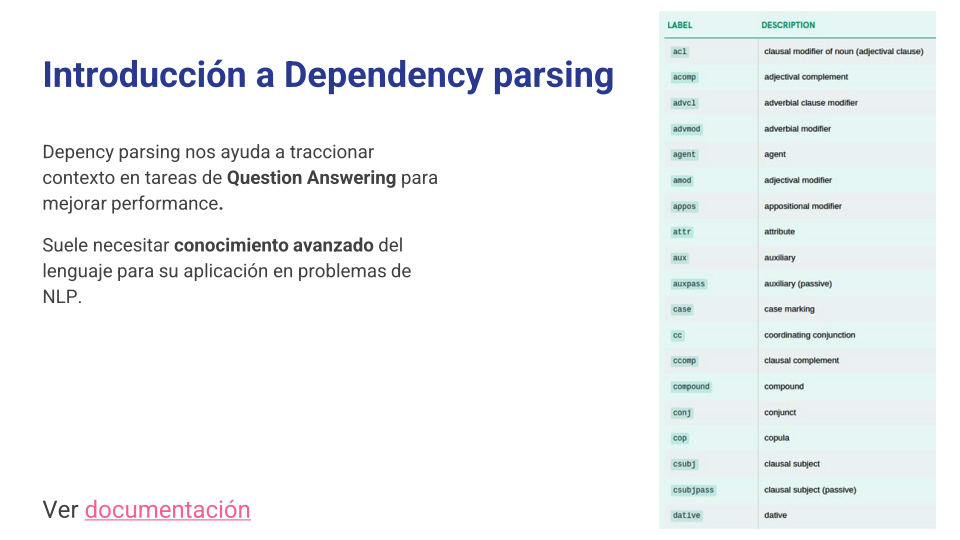

### Named Entity Recognition

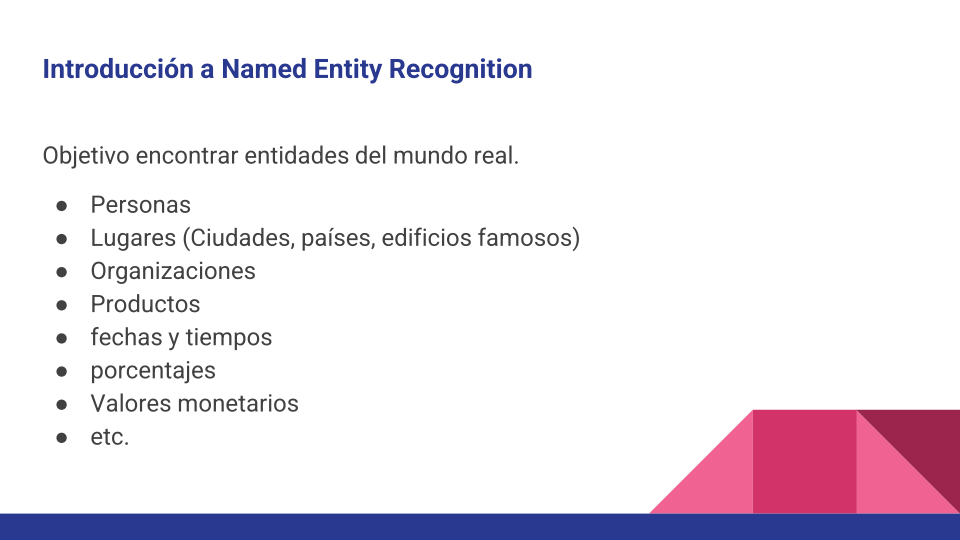

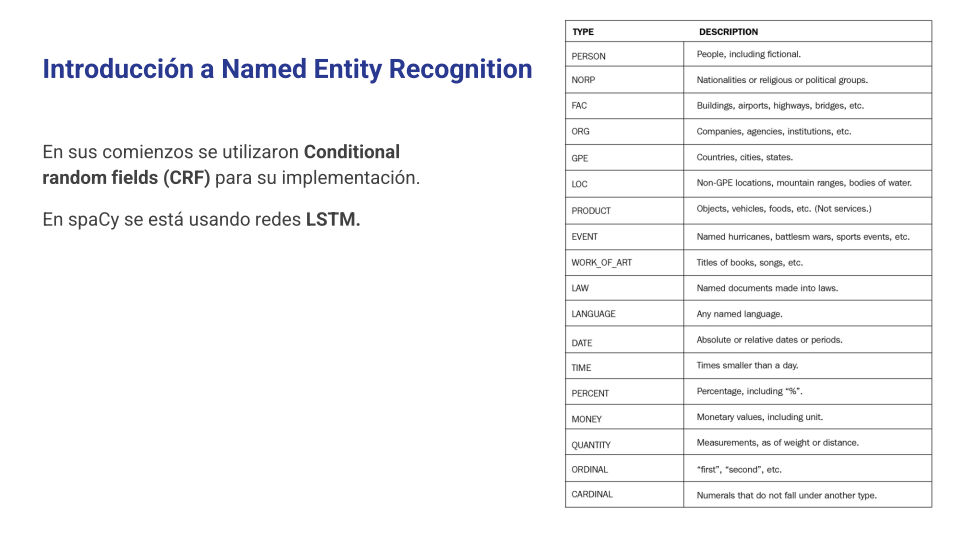

In [ ]:
nlp = spacy.load('es_core_news_md')
doc = nlp("El presidente argentino Milei se reunió con Trump en Estados Unidos")

In [ ]:
doc.ents

(Milei, Trump, en Estados Unidos)

In [ ]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [ ]:
spacy.explain("PER")

'Named person or family.'

In [ ]:
for token in doc:
  print(token.text, token.ent_type_, spacy.explain(token.ent_type_))

In [ ]:
doc = nlp("Martin Becerra esta dando una clase de NLP en la Universidad Nacional de La Matanza en San Justo")

In [ ]:
doc.ents

(Martin Becerra, Universidad Nacional de La Matanza, San Justo)

In [ ]:
for token in doc:
  print(token.text, token.ent_type_, spacy.explain(token.ent_type_))

Martin PER Named person or family.
Becerra PER Named person or family.
esta  None
dando  None
una  None
clase  None
de  None
NLP  None
en  None
la  None
Universidad ORG Companies, agencies, institutions, etc.
Nacional ORG Companies, agencies, institutions, etc.
de ORG Companies, agencies, institutions, etc.
La ORG Companies, agencies, institutions, etc.
Matanza ORG Companies, agencies, institutions, etc.
en  None
San LOC Non-GPE locations, mountain ranges, bodies of water
Justo LOC Non-GPE locations, mountain ranges, bodies of water


/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


#### Caso de aplicación

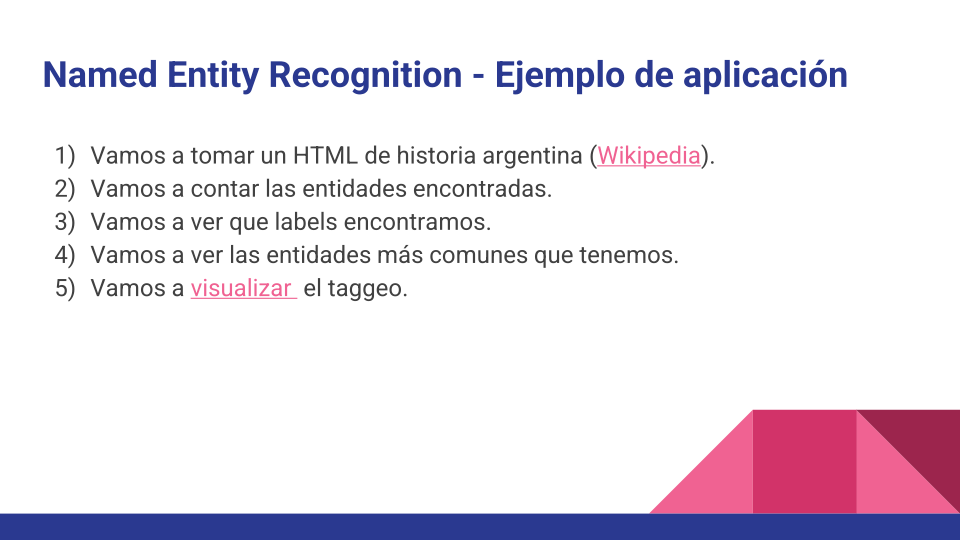

Para saber más sobre visualización de entidades ver este [link](https://spacy.io/usage/visualizers#ent)

In [59]:
import spacy
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [60]:
from bs4 import BeautifulSoup
import requests
import spacy
def url_text(url_string):
    res = requests.get(url_string)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    text = soup.get_text()
    return " ".join(text.split())

hist_arg = url_text("https://es.wikipedia.org/wiki/Historia_de_la_Argentina")
nlp = spacy.load("es_core_news_md")
doc = nlp(hist_arg)

In [61]:
len(doc.ents)

5869

In [62]:
from collections import Counter
labels = [ent.label_ for ent in doc.ents]
Counter(labels)

Counter({'MISC': 1730, 'LOC': 1856, 'PER': 1576, 'ORG': 707})

In [63]:
items = [ent.text for ent in doc.ents]
Counter(items).most_common(25)

[('Consultado', 138),
 ('Buenos Aires', 117),
 ('Argentina', 92),
 ('Archivado desde el original', 86),
 ('Perón', 54),
 ('Chile', 39),
 ('Archivado', 35),
 ('la Argentina', 34),
 ('Brasil', 33),
 ('España', 31),
 ('Clarín', 29),
 ('Yrigoyen', 25),
 ('Gobierno', 22),
 ('Río de la Plata', 21),
 ('Hipólito Yrigoyen', 20),
 ('Estado', 20),
 ('Frondizi', 20),
 ('Córdoba', 19),
 ('Uruguay', 19),
 ('Congreso', 19),
 ('Patagonia', 17),
 ('Alfonsín', 17),
 ('América', 16),
 ('Paraguay', 16),
 ('Iglesia', 16)]

In [64]:
print(doc.ents)

(Wikipedia, Ir, Menú, Menú, Navegación PortadaPortal, Buscar Buscar Apariencia, Acceder Herramientas personales Crear una cuenta, Acceder Páginas, ContribucionesDiscusión, Inicio 1 Poblamiento, Imperio Español, Argentina, Imperio Español, Río de la Plata, Colonización del Río de la Plata, Colonización del Cuyo, Descubrimiento, Antártida, Conflictos, Portugal, Brasil, Creación del Virreinato del Río de la Plata, Descubrimiento, Islas Malvinas, Puelmapu, Estado nación, Alternar subsección Surgimiento del Estado nación, Campaña, Guerra civil 5.4 Las islas Malvinas, Presidencia de Rivadavia, Brasil, Gobierno de Juan Manuel de Rosas, Islas Malvinas, Organización Nacional, Alternar subsección La Organización Nacional, Mitre, Sarmiento, República Conservadora, Alternar subsección, La República Conservadora, Centenario 7.4 Participación argentina, Antártida 8, Alternar subsección, Hipólito Yrigoyen, Marcelo T. de Alvear, Hipólito Yrigoyen, La «Década Infame, Alternar subsección La «Década Infa

Para filtrar entidades que no corresponden podemos probar quitar las entidades MISC:

In [65]:
items = [ent.text for ent in doc.ents if ent.label_ != 'MISC']
Counter(items).most_common(25)

[('Buenos Aires', 117),
 ('Argentina', 92),
 ('Perón', 54),
 ('Chile', 39),
 ('la Argentina', 34),
 ('Brasil', 33),
 ('Archivado', 33),
 ('España', 31),
 ('Clarín', 28),
 ('Yrigoyen', 25),
 ('Río de la Plata', 21),
 ('Hipólito Yrigoyen', 20),
 ('Frondizi', 20),
 ('Córdoba', 19),
 ('Uruguay', 19),
 ('Congreso', 19),
 ('Patagonia', 17),
 ('Alfonsín', 17),
 ('América', 16),
 ('Paraguay', 16),
 ('Iglesia', 16),
 ('Estado', 16),
 ('Unión Cívica Radical', 16),
 ('Islas Malvinas', 14),
 ('Tucumán', 14)]

In [66]:
from spacy import displacy # Ver documentacion de displacy -> https://spacy.io/usage/visualizers

In [67]:
displacy.render(doc, style="ent")

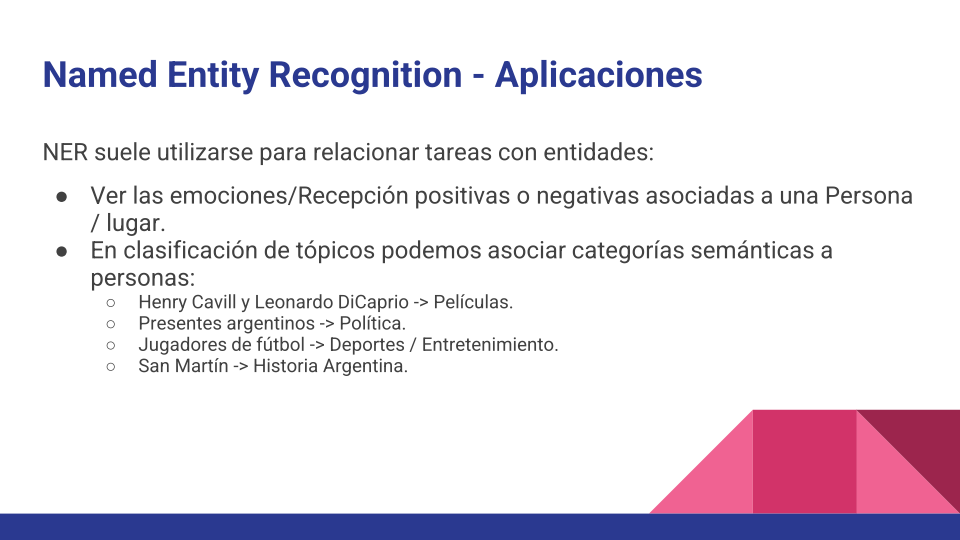

### Merge and split tokens

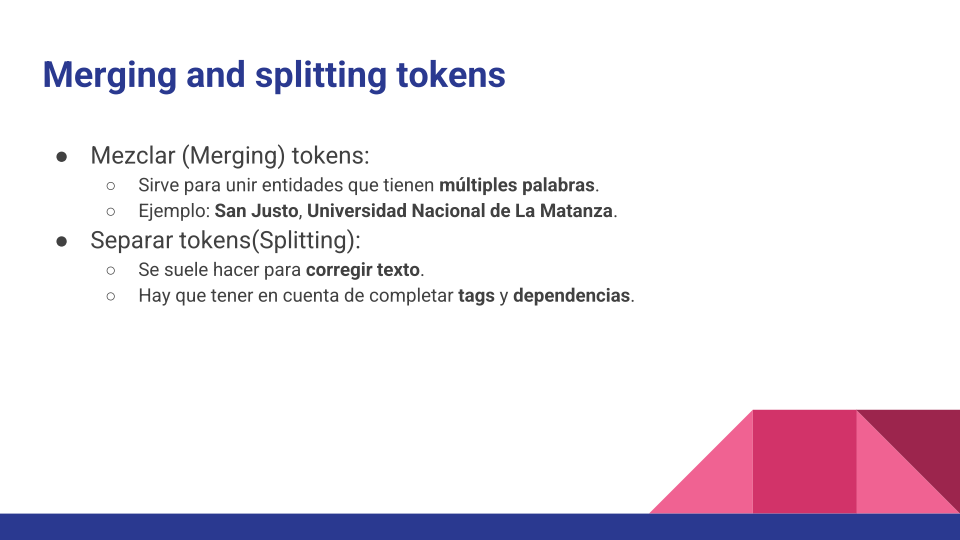

#### Merge tokens

In [68]:
nlp = spacy.load('es_core_news_md')
doc = nlp("Los alumnos de ingeniería cursan en la Universidad Nacional de La Matanza")

In [69]:
[print(token.text, token.i, token.pos_, token.tag_, token.dep_) for token in doc]


Los 0 DET DET det
alumnos 1 NOUN NOUN nsubj
de 2 ADP ADP case
ingeniería 3 NOUN NOUN nmod
cursan 4 VERB VERB ROOT
en 5 ADP ADP case
la 6 DET DET det
Universidad 7 PROPN PROPN obl
Nacional 8 PROPN PROPN flat
de 9 ADP ADP case
La 10 DET DET det
Matanza 11 PROPN PROPN flat


[None, None, None, None, None, None, None, None, None, None, None, None]

In [70]:
doc.ents

(Universidad Nacional de La Matanza,)

In [71]:
with doc.retokenize() as retokenizer:
  retokenizer.merge(doc[7:], attrs={"LEMMA": "Universidad Nacional de La Matanza"})

In [72]:
doc.ents

(Universidad Nacional de La Matanza,)

In [73]:
[print(token.text, token.i, token.pos_, token.tag_, token.dep_) for token in doc]

Los 0 DET DET det
alumnos 1 NOUN NOUN nsubj
de 2 ADP ADP case
ingeniería 3 NOUN NOUN nmod
cursan 4 VERB VERB ROOT
en 5 ADP ADP case
la 6 DET DET det
Universidad Nacional de La Matanza 7 PROPN PROPN obl


[None, None, None, None, None, None, None, None]

In [74]:
spacy.explain('PROPN')

'proper noun'

#### Split tokens

In [75]:
nlp = spacy.load('es_core_news_md')
doc = nlp("Universidad Nacional de LaMatanza")

In [76]:
[print(token.text, token.lemma_, token.i, token.pos_, token.tag_, token.dep_) for token in doc]

Universidad Universidad 0 PROPN PROPN ROOT
Nacional Nacional 1 PROPN PROPN flat
de de 2 ADP ADP case
LaMatanza LaMatanza 3 PROPN PROPN flat


[None, None, None, None]

In [77]:
from spacy import displacy

In [78]:
displacy.render(doc, style="dep")

In [79]:
with doc.retokenize() as retokenizer:
  heads = [(doc[3], 1), doc[0]]
  attrs = { "TAG": ["DET", "PROPN"],
            "DEP": ["det", "flat"]}
  retokenizer.split(doc[3], ["La", "Matanza"], heads=heads, attrs=attrs)


In [80]:
[print(token.text, token.i, token.pos_, token.tag_, token.dep_) for token in doc]

Universidad 0 PROPN PROPN ROOT
Nacional 1 PROPN PROPN flat
de 2 ADP ADP case
La 3 PROPN DET det
Matanza 4  PROPN flat


[None, None, None, None, None]

In [81]:
displacy.render(doc, style="dep")

## Rule-Based matching

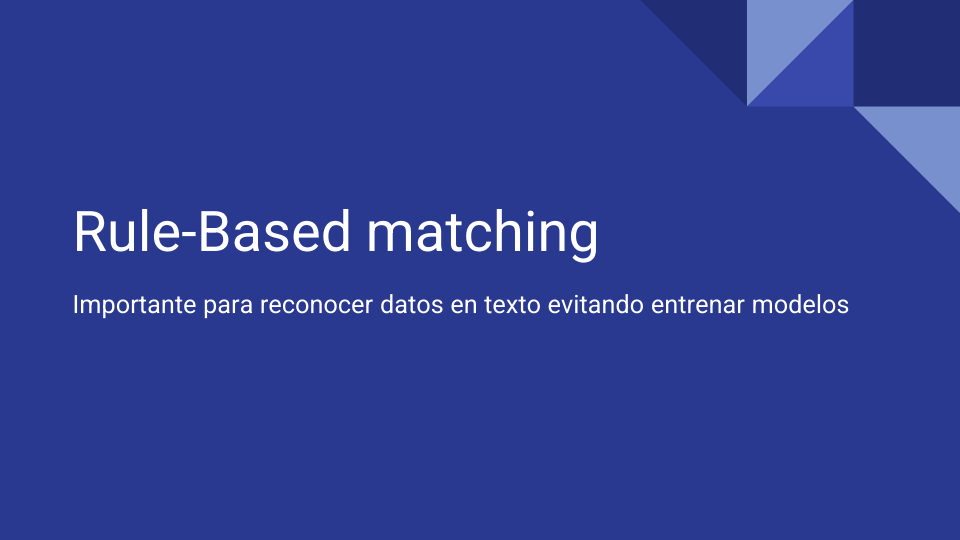

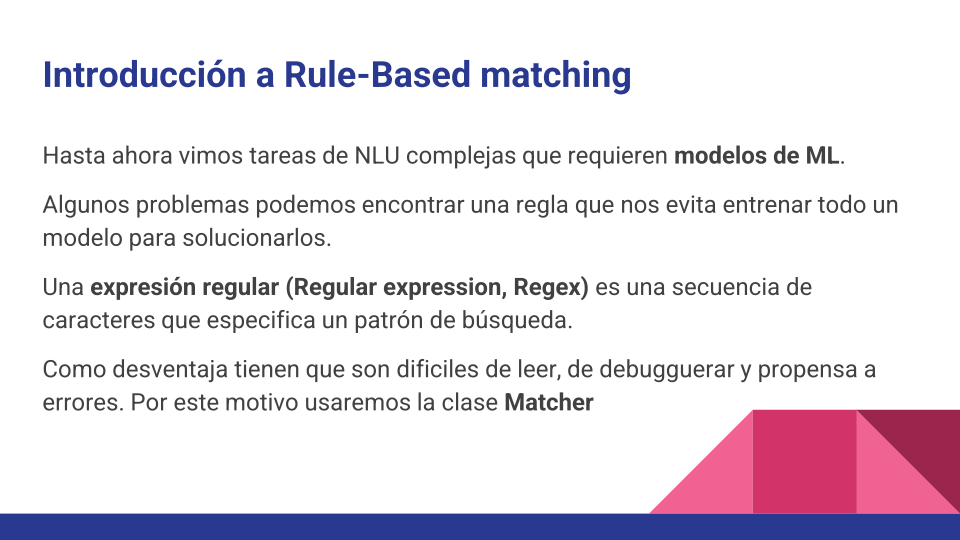

In [82]:
import spacy
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Token-based matching

In [83]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_md")

Buscamos un patrón solo en el texto:

In [84]:
doc = nlp("Buenos días, quiero reservar una mesa para esta noche")
matcher = Matcher(nlp.vocab)
pattern = [{"LOWER": "buenos"}, {"LOWER": "días"}, {"IS_PUNCT": True}] # Con esta rule podemos disparar un saludo en un chatbot NLU.
matcher.add("goodMorningPattern", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
  m_span = doc[start:end]
  print(start, end, m_span.text)

0 3 Buenos días,


Buscamos más de un patrón en el texto:

In [85]:
doc = nlp("Buenos días, quiero reservar una mesa para esta noche. Cuando llegue voy a decir buenas noches.")
matcher = Matcher(nlp.vocab)
pattern1 = [{"LOWER": "buenos"}, {"LOWER": "días"}, {"IS_PUNCT": True}] # Con esta rule podemos disparar un saludo en un chatbot NLU.
matcher.add("goodMorningPattern", [pattern1])

pattern2 = [{"LOWER": "buenas"}, {"LOWER": "noches"}]
matcher.add("goodEveningPattern", [pattern2])

matches = matcher(doc)

for match_id, start, end in matches:
  m_span = doc[start:end]
  print(start, end, m_span.text)

0 3 Buenos días,
16 18 buenas noches


Buscar usando lemmas:

In [86]:
doc = nlp("Buenos días, quiero reservar una mesa para esta noche para 22 personas. Voy a estar reservando una cancha antes y paso a dejar la seña")

In [87]:
matcher = Matcher(nlp.vocab)
pattern = [{"LEMMA": "reservar"}, {}, {}]
matcher.add("reservarPattern", [pattern])
matches = matcher(doc)

for match_id, start, end in matches:
  m_span = doc[start:end]
  print(start, end, m_span.text)

4 7 reservar una mesa
17 20 reservando una cancha


Ver más [patrones](https://spacy.io/usage/rule-based-matching#adding-patterns-attributes)

Ver [editor interactivo de matcher](https://demos.explosion.ai/matcher)

### Phrase Matcher

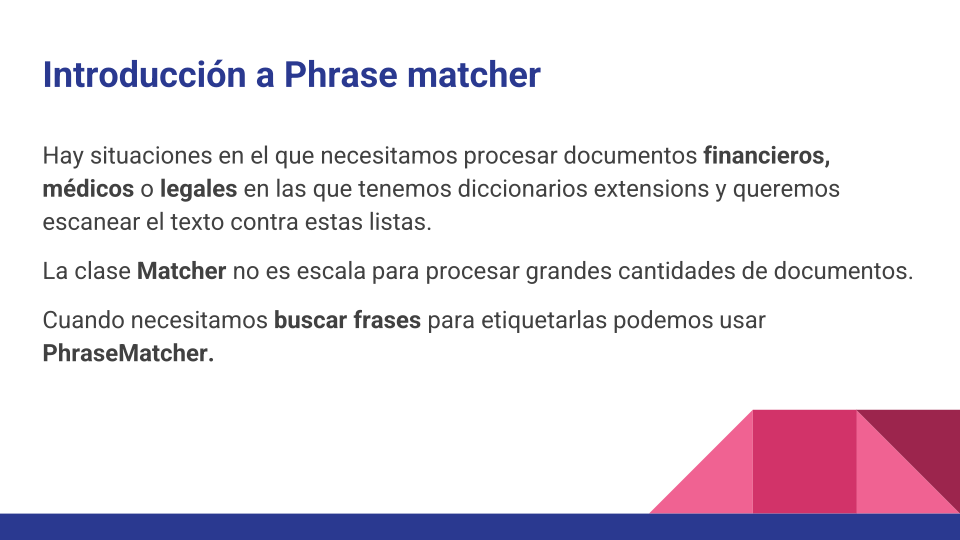

Se utiliza para buscar vocabulario especializado en documentos financieros, salud, medicos y legales.   

In [88]:
import spacy
from spacy.matcher import PhraseMatcher
nlp = spacy.load("es_core_news_md")

In [89]:
doc = nlp("""Un documento financiero es un apunte contable que se genera de manera automática en
Génesis cuando se realiza cualquier tipo de operación, ya sea el registro de una factura, la carga de extractos bancarios, conciliaciones
bancarias, etc. A continuación se analizarán detalladamente los documentos financieros más
habituales con la finalidad de conocer su situación en cada momento. Para ello, se visualizarán los documentos a través de la ruta de menú SAP""")

In [90]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
terms = ["documento financiero", "factura"]
patterns = [nlp.make_doc(term) for term in terms]
matcher.add("financeTerms", patterns)

In [91]:
matches = matcher(doc)
for mid, start, end in matches:
  print(start, end, doc[start:end])

1 3 documento financiero
30 31 factura


Ver [phraseMatcher](https://spacy.io/api/phrasematcher)

### Entity Ruler

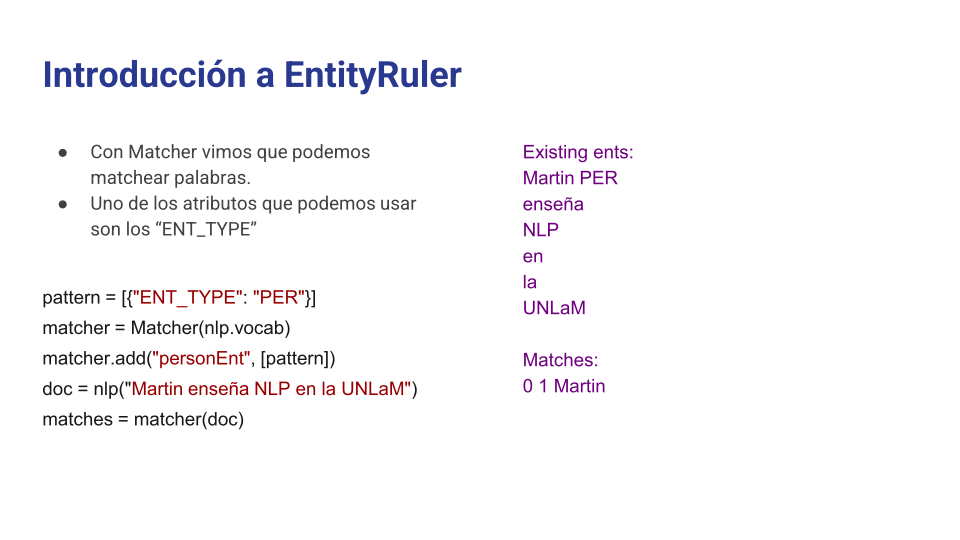

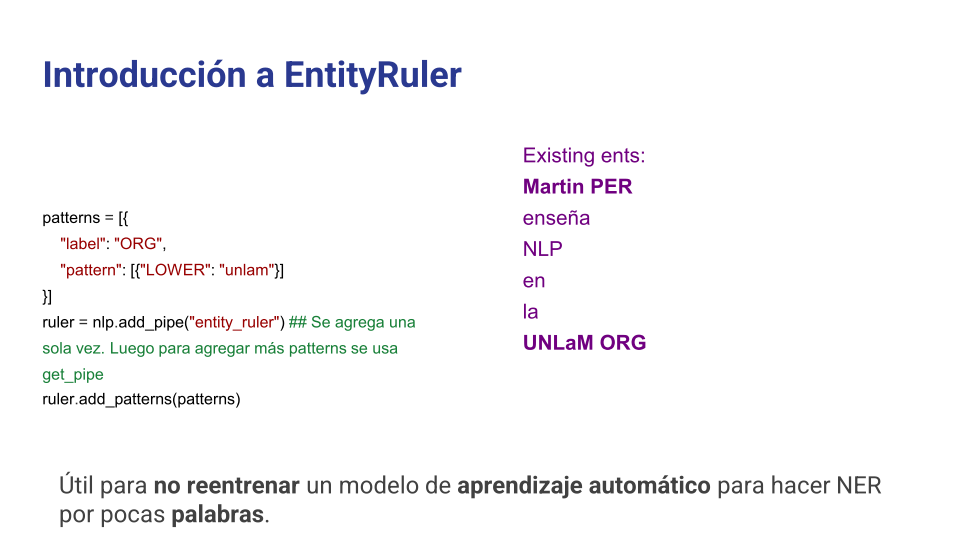

In [92]:
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Vimos que podemos usar matcher para buscar entidades.

In [115]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_md")

In [116]:
pattern = [{"ENT_TYPE": "PER"}]
matcher = Matcher(nlp.vocab)
matcher.add("personEnt", [pattern])
doc = nlp("Martin enseña NLP en la UNLaM")
matches = matcher(doc)

print("Existing ents:")

for token in doc:
  print(token.text, token.ent_type_)

print("Matches:")
for mid, start, end in matches:
  print(start, end, doc[start:end])


Existing ents:
Martin PER
enseña 
NLP 
en 
la 
UNLaM 
Matches:
0 1 Martin


In [103]:
patterns = [{
    "label": "ORG",
    "pattern": [{"LOWER": "unlam"}]
}]
ruler = nlp.add_pipe("entity_ruler") ## Se agrega una sola vez. Luego para agregar mas patterns se usa get_pipe
ruler.add_patterns(patterns)

In [104]:
doc = nlp("Martin enseña NLP en la UNLaM")

print("Existing ents:")
for token in doc:
  print(token.text, token.ent_type_)

Existing ents:
Martin PER
enseña 
NLP 
en 
la 
UNLaM ORG


Agregar un pattern: para encontrar títulos: Ing, Mg., Dr. y etiquetarlos como TITLE:  

In [113]:
patterns = [
    {"label": "TITLE", "pattern": [{"LOWER": "dr"}]},
    {"label": "TITLE", "pattern": [{"LOWER": "ing"}]},
    {"label": "TITLE", "pattern": [{"LOWER": "mg"}]},
]

# Agregar EntityRuler al pipeline (solo si no se ha agregado antes)
ruler = nlp.add_pipe("entity_ruler")

# Agregar los patrones al EntityRuler
ruler.add_patterns(patterns)

In [117]:
doc = nlp("El Dr Gonzales quiere colaborar con la Ing Rodriguez y el Mg Martinez")

print("Existing ents:")
for token in doc:
  print(token.text, token.ent_type_)

Existing ents:
El 
Dr PER
Gonzales PER
quiere 
colaborar 
con 
la 
Ing PER
Rodriguez PER
y 
el 
Mg ORG
Martinez ORG


In [126]:
import spacy

# Cargar el modelo de spaCy
nlp = spacy.load("es_core_news_md")

# Definir patrones para títulos
patterns = [
    {"label": "TITLE", "pattern": [{"LOWER": "dr"}]},
    {"label": "TITLE", "pattern": [{"LOWER": "ing"}]},
    {"label": "TITLE", "pattern": [{"LOWER": "mg"}]},
]

# Agregar EntityRuler al pipeline (solo si no se ha agregado antes)
if "entity_ruler" not in nlp.pipe_names:
    ruler = nlp.add_pipe("entity_ruler")
else:
    ruler = nlp.get_pipe("entity_ruler")

# Agregar los patrones al EntityRuler
ruler.add_patterns(patterns)

# Probar el modelo en un texto
doc = nlp("Se solicita un Dr, un Ing. y un Mg")

# Mostrar las entidades reconocidas
for ent in doc.ents:
  print(ent.text, ent.label_)


Dr PER
Mg TITLE


## Word Vector y Semantic Similarity

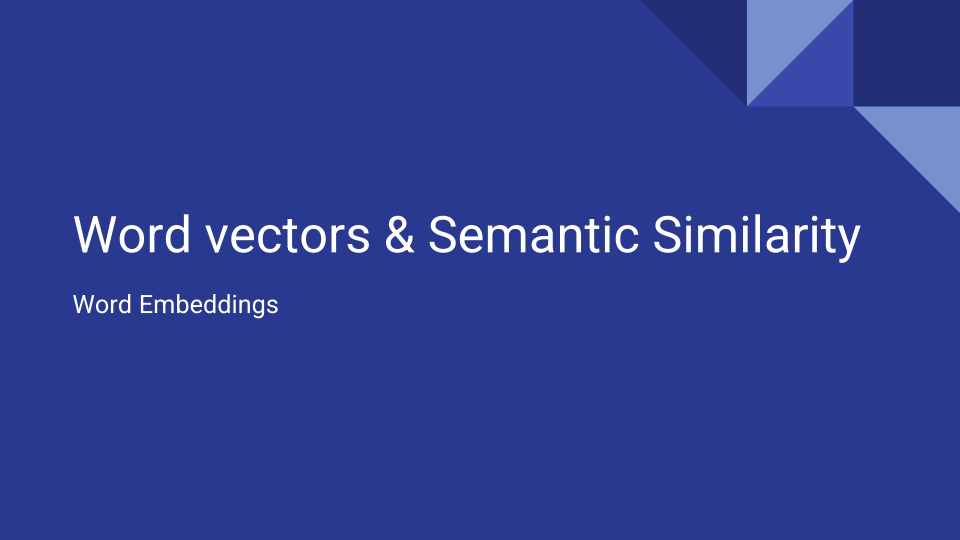

En spaCy podemos usar el paradigma de semántica estadística distribucional

In [127]:
import spacy
import spacy.cli
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Representación de vectores

In [128]:
nlp = spacy.load("es_core_news_md")
doc = nlp("Mañana voy a jugar el fútbol")

print("Shape del vector de la palabra fútbol:")
print(doc[5].vector.shape)
print(doc[5].vector)

Shape del vector de la palabra fútbol:
(300,)
[ 2.7259    0.47304   0.047621  1.9558   -0.30063  -1.0179   -0.97721
 -2.0245    0.7204    1.8438   -3.026    -0.63421  -0.025738  2.8336
 -0.53767   0.47612  -3.4098   -1.4225    0.78622  -3.3718   -0.92297
  2.3582    0.3264   -1.2628   -1.2179   -0.34772  -0.34666   0.95976
 -2.0566   -0.75722   0.34777  -0.86924  -0.36965   1.1945   -0.82212
 -0.12956  -0.55068   3.2662    3.952    -0.98656  -1.8602   -0.8363
 -0.25082  -0.26291  -2.4843   -0.22017   2.3968   -2.0296    0.24877
 -2.6642    2.588     0.749     2.0853   -2.1065   -0.2107   -1.1014
 -0.19401  -0.84679  -4.8289    1.7421    0.24022   1.1816   -0.78074
 -0.53791   4.2987    0.64407  -0.44891  -2.2249    4.0216   -0.39021
  0.5536    1.268     3.1663   -0.37098  -0.44044  -2.6427   -0.33172
  1.9893   -2.7519    0.49162  -0.32292  -2.455    -0.24557   4.3743
  0.91983  -1.814    -0.95014   0.91682  -1.3769   -1.1577   -1.203
  1.8617    0.78209   1.6198    1.0649   -0.46398 

### Similarity

In [129]:
doc = nlp("vamos a ver asdasdad")

In [130]:
for token in doc:
  print(token.text, token.is_oov, token.has_vector)

vamos False True
a False True
ver False True
asdasdad True False


In [131]:
doc1 = nlp("Vamos a Buenos Aires")
doc2 = nlp("Fuimos a Argentina")

In [132]:
doc1.similarity(doc2)

0.9118882258365054

### Aplicaciones: Categorizar texto con semantic Similarity

Veamos como podemos seleccionar textos a partir de una palabra:

In [133]:
doc = nlp("La semana pasada compré un libro de borges. Viajamos a mendoza. Compramos una botella de vino.")

In [134]:
key = nlp("bebidas")

In [135]:
for sent in doc.sents:
  print(sent.similarity(key))

-0.04807292860251919
0.07776802003695933
0.2849467687208551


Aplicaciones: Extracción  y comparación de Named entities

In [136]:
doc1 = nlp("""El buscador de Google o buscador web de Google (en inglés Google Search) es un motor de búsqueda en la web propiedad de Alphabet Inc.
              Es el motor de búsqueda más utilizado en la Web​ y recibe cientos de millones de consultas cada día a través de sus diferentes servicios.""")

In [137]:
doc2 = nlp("""Microsoft Bing (comúnmente conocido como Bing) es un motor de búsqueda web de Microsoft.
El servicio tiene su origen en los anteriores motores de búsqueda de Microsoft: MSN Search, Windows Live Search y posteriormente Live Search.​
Bing proporciona varios servicios de búsqueda, incluidos productos de búsqueda web, de vídeo, de imágenes y de mapas. Se desarrolla utilizando ASP.NET.""")

In [138]:
doc3 = nlp("""Las cataratas del Iguazú (en portugués: cataratas do Iguaçu) son un conjunto de cataratas que se localizan en el río Iguazú,
              en el límite entre la provincia argentina de Misiones, el estado brasileño de Paraná.""")

In [139]:
doc1.ents

(Google, Google, Google Search, Alphabet Inc, Web​)

In [140]:
doc2.ents

(Microsoft Bing,
 Bing,
 Microsoft,
 Microsoft,
 MSN Search,
 Windows Live Search,
 Live Search.​
 Bing,
 ASP.NET)

In [141]:
doc3.ents

(cataratas del Iguazú, cataratas do Iguaçu, río Iguazú, Misiones, Paraná)

In [142]:
ents1 = [ent.text for ent in doc1.ents]
ents2 = [ent.text for ent in doc2.ents]
ents3 = [ent.text for ent in doc3.ents]

In [143]:
doc_ents_1 = nlp(" ".join(ents1))
doc_ents_2 = nlp(" ".join(ents2))
doc_ents_3 = nlp(" ".join(ents3))

In [144]:
doc_ents_1.similarity(doc_ents_2) # Google & Microsoft

0.7357175541387182

In [145]:
doc_ents_1.similarity(doc_ents_3) # Google & Cataratas del iguazu

-0.07641733799402659